<a href="https://colab.research.google.com/github/ghazalna/Deep-Learning/blob/main/RandomSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow scikeras scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier

INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.


In [3]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flatten the images for dense layers
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# Convert labels to categorical
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
# Function to create model, required for KerasClassifier
def create_model(hidden_layers=1, units=64, activation='relu', optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Dense(units, activation=activation, input_shape=(train_images.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(units, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter space for random search
param_dist = {
    'model__hidden_layers': [1, 2, 3, 4, 5],
    'model__units': [32, 64, 128, 256, 512],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'sgd'],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

In [5]:
# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=1)
random_search_result = random_search.fit(train_images, train_labels)

# Display the best parameters
print(f"Best parameters found: {random_search_result.best_params_}")

# Train the best model
best_model = random_search_result.best_estimator_
history = best_model.fit(train_images, train_labels, validation_data=(test_images, test_labels))

# Evaluate the best model
train_loss, train_acc = best_model.model_.evaluate(train_images, train_labels)
test_loss, test_acc = best_model.model_.evaluate(test_images, test_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END batch_size=32, epochs=30, model__activation=tanh, model__hidden_layers=1, model__optimizer=adam, model__units=512; total time=10.5min
[CV] END batch_size=32, epochs=30, model__activation=tanh, model__hidden_layers=1, model__optimizer=adam, model__units=512; total time=10.4min
[CV] END batch_size=32, epochs=30, model__activation=tanh, model__hidden_layers=1, model__optimizer=adam, model__units=512; total time=10.4min
[CV] END batch_size=64, epochs=10, model__activation=tanh, model__hidden_layers=1, model__optimizer=sgd, model__units=64; total time=  21.7s
[CV] END batch_size=64, epochs=10, model__activation=tanh, model__hidden_layers=1, model__optimizer=sgd, model__units=64; total time=  23.1s
[CV] END batch_size=64, epochs=10, model__activation=tanh, model__hidden_layers=1, model__optimizer=sgd, model__units=64; total time=  23.0s
[CV] END batch_size=128, epochs=20, model__activation=relu, model__hidden_layers=4, mod

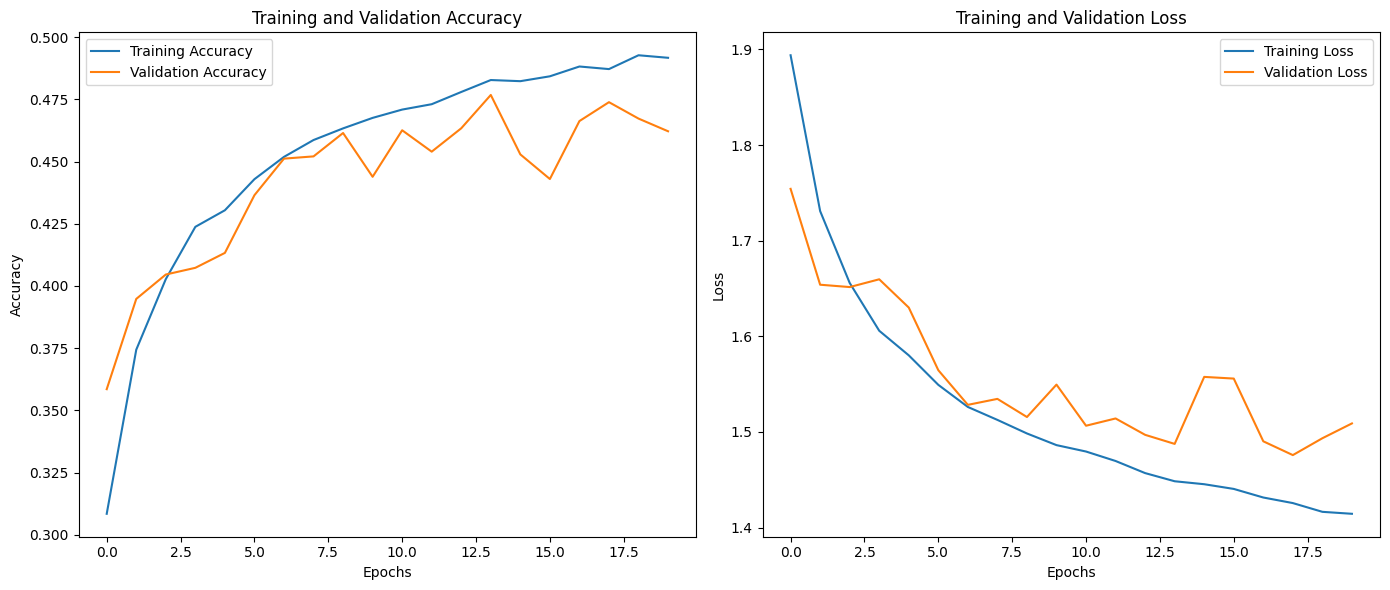

Training Loss: 1.4017653465270996
Training Accuracy: 0.49549999833106995
Testing Loss: 1.5089117288589478
Testing Accuracy: 0.46219998598098755


In [6]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history_['accuracy'], label='Training Accuracy')
plt.plot(history.history_['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history_['loss'], label='Training Loss')
plt.plot(history.history_['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_acc}")
print(f"Testing Loss: {test_loss}")
print(f"Testing Accuracy: {test_acc}")